In [1]:
import sys
sys.path.append("../../src")
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import pickle
from example_lorenz import get_lorenz_data, generate_lorenz_data
from autoencoder_lorenz import full_network
from training_lorenz import create_feed_dictionary
from sindy_utils import sindy_simulate
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/home/marsgao/.conda/envs/mars/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/marsgao/.conda/envs/mars/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/marsgao/.conda/envs/mars/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/marsgao/.conda/envs/mars/lib/python3.7/site-packages

In [2]:
data_path = os.getcwd() + '/'
save_name = 'model1'
params = pickle.load(open(data_path + save_name + '_params.pkl', 'rb'))
params['save_name'] = data_path + save_name

autoencoder_network = full_network(params)
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
saver = tf.train.Saver(var_list=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES))

tensorflow_run_tuple = ()
for key in autoencoder_network.keys():
    tensorflow_run_tuple += (autoencoder_network[key],)



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.






## Single trajectory plots

In [3]:
t = np.arange(0,20,.01)
z0 = np.array([[-8,7,27]])

test_data = generate_lorenz_data(z0, t, params['input_dim'], linear=False, normalization=np.array([1/40,1/40,1/40]))
test_data['x'] = test_data['x'].reshape((-1,params['input_dim']))
test_data['dx'] = test_data['dx'].reshape((-1,params['input_dim']))
test_data['z'] = test_data['z'].reshape((-1,params['latent_dim']))
test_data['dz'] = test_data['dz'].reshape((-1,params['latent_dim']))

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = tf_results[i]


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/marsgao/BayesianSindyAutoencoder/exmaples/lorenz/model1


2024-01-30 17:00:19.756768: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2024-01-30 17:00:19.772675: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-30 17:00:19.772732: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: lambda
2024-01-30 17:00:19.772742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: lambda
2024-01-30 17:00:19.772886: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.86.5
2024-01-30 17:00:19.772920: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.86.5
2024-01-30 17:00:19.772928: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 535.86.5
2024-01-30 17:00:19.775451: I tensorflow/core/platform/cpu_feature_gua

In [5]:
test_set_results

{'coefficient_mask': array([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 1.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 'x': array([[0.0058125 , 0.04410212, 0.07546645, ..., 0.7565595 , 0.8517104 ,
         0.9549062 ],
        [0.05121063, 0.08242277, 0.10763301, ..., 0.7400254 , 0.8261217 ,
         0.9192858 ],
        [0.0912123 , 0.11669727, 0.13693042, ..., 0.7246531 , 0.803165  ,
         0.8879443 ],
        ...,
        [0.14640953, 0.14020492, 0.13397227, ..., 0.3084625 , 0.32032415,
         0.33251634],
        [0.13924235, 0.13322   , 0.12717855, ..., 0.31791577, 0.32970923,
         0.34182364],
        [0.1320653 , 0.12

In [6]:
test_set_results['sindy_coefficients']

array([[-7.5993671e+00, -3.4142362e-05,  1.5934948e-04],
       [-2.7062855e+00, -1.5782069e-04, -2.2643246e-04],
       [-1.5051784e-04, -8.6133170e-01, -1.0608314e+01],
       [-9.7849261e-06, -1.1565039e-04, -1.0085757e+01],
       [-1.0053160e-04, -4.1286105e-05, -1.3184456e-04],
       [ 1.5280207e-04, -6.1511647e-02,  1.6146622e-04],
       [-6.1845640e-11,  9.1100731e+00,  4.1777879e-05],
       [ 5.2831783e-05, -8.6646323e-06,  1.3854247e-04],
       [-3.1547348e+00, -1.9153471e-05,  6.8331894e-05],
       [ 6.4619497e-05, -4.7846268e-05,  6.9028902e-06],
       [-4.9486407e-05,  2.4719375e-05, -3.1497507e-04],
       [-1.2097793e-05,  2.5356980e-04,  2.3517756e-04],
       [ 1.1318444e-04, -7.9742807e-05, -1.4692624e-04],
       [-1.6286100e-04, -3.5987345e-05, -6.3226427e-05],
       [ 1.5321854e-04,  1.7019967e-04,  3.1464393e-04],
       [-3.1842632e-05, -1.8675231e-04,  3.1491098e-04],
       [-6.8846537e-05, -1.6263803e-06,  4.5788454e-04],
       [ 1.2341101e-04, -5.4483

In [7]:
np.sum(np.abs(test_set_results['sindy_coefficients']) > 0.1)

7

In [8]:
test_set_results['sindy_coefficients']

array([[-7.5993671e+00, -3.4142362e-05,  1.5934948e-04],
       [-2.7062855e+00, -1.5782069e-04, -2.2643246e-04],
       [-1.5051784e-04, -8.6133170e-01, -1.0608314e+01],
       [-9.7849261e-06, -1.1565039e-04, -1.0085757e+01],
       [-1.0053160e-04, -4.1286105e-05, -1.3184456e-04],
       [ 1.5280207e-04, -6.1511647e-02,  1.6146622e-04],
       [-6.1845640e-11,  9.1100731e+00,  4.1777879e-05],
       [ 5.2831783e-05, -8.6646323e-06,  1.3854247e-04],
       [-3.1547348e+00, -1.9153471e-05,  6.8331894e-05],
       [ 6.4619497e-05, -4.7846268e-05,  6.9028902e-06],
       [-4.9486407e-05,  2.4719375e-05, -3.1497507e-04],
       [-1.2097793e-05,  2.5356980e-04,  2.3517756e-04],
       [ 1.1318444e-04, -7.9742807e-05, -1.4692624e-04],
       [-1.6286100e-04, -3.5987345e-05, -6.3226427e-05],
       [ 1.5321854e-04,  1.7019967e-04,  3.1464393e-04],
       [-3.1842632e-05, -1.8675231e-04,  3.1491098e-04],
       [-6.8846537e-05, -1.6263803e-06,  4.5788454e-04],
       [ 1.2341101e-04, -5.4483

In [9]:
test_set_results['coefficient_mask'][5,1] = 0.0

In [10]:
a3 = 1
a2 = test_data['sindy_coefficients'][2,0]/test_set_results['sindy_coefficients'][2,2]
a1 = np.sqrt(-test_set_results['sindy_coefficients'][8,0]/test_set_results['sindy_coefficients'][6,1]*a2**2)
b1 = -test_set_results['sindy_coefficients'][0,0]/test_set_results['sindy_coefficients'][1,0]

sindy_coefficients_transformed = np.zeros(test_set_results['sindy_coefficients'].shape)
sindy_coefficients_transformed[1,0] = test_set_results['sindy_coefficients'][3,2]
sindy_coefficients_transformed[2,0] = test_set_results['sindy_coefficients'][2,2]*a2/a3
sindy_coefficients_transformed[1,1] = test_set_results['sindy_coefficients'][6,1]*a3/a2*b1
sindy_coefficients_transformed[2,1] = test_set_results['sindy_coefficients'][2,1]
sindy_coefficients_transformed[6,1] = test_set_results['sindy_coefficients'][6,1]*a3*a1/a2
sindy_coefficients_transformed[3,2] = test_set_results['sindy_coefficients'][1,0]
sindy_coefficients_transformed[5,2] = test_set_results['sindy_coefficients'][8,0]*a3*a2/a1

z0_transformed = np.array([test_set_results['z'][0,0]/a3,
                           test_set_results['z'][0,1]/a2,
                           (test_set_results['z'][0,2] - b1)/a1])

In [11]:
arr = np.load("save_refinement_1.npy")
print(arr.shape)
arr_truncate = arr[0:-10]

arr_truncate = arr_truncate.reshape((100, 20, 3))
arr_mean = np.mean(arr_truncate, axis=0)
arr_std = np.std(arr_truncate, axis=0)

a3 = 1
a2 = test_data['sindy_coefficients'][2,0]/arr_mean[2,2]
a1 = np.sqrt(-arr_mean[8,0]/arr_mean[6,1]*a2**2)
b1 = -arr_mean[0,0]/arr_mean[1,0]

sindy_coefficients_transformed = np.zeros(test_set_results['sindy_coefficients'].shape)
sindy_coefficients_transformed[1,0] = arr_mean[3,2]
sindy_coefficients_transformed[2,0] = arr_mean[2,2]*a2/a3
sindy_coefficients_transformed[1,1] = arr_mean[6,1]*a3/a2*b1
sindy_coefficients_transformed[2,1] = arr_mean[2,1]
sindy_coefficients_transformed[6,1] = arr_mean[6,1]*a3*a1/a2
sindy_coefficients_transformed[3,2] = arr_mean[1,0]
sindy_coefficients_transformed[5,2] = arr_mean[8,0]*a3*a2/a1

z0_transformed = np.array([test_set_results['z'][0,0]/a3,
                           test_set_results['z'][0,1]/a2,
                           (test_set_results['z'][0,2] - b1)/a1])

(110, 20, 3)


In [12]:
print(a1)
print(a2)
print(a3)
print(b1)

0.5527920287513279
-0.9437478419126746
1
-2.8003375544484745


In [13]:
sindy_coefficients_transformed

array([[  0.        ,   0.        ,   0.        ],
       [-10.08605375,  27.08642423,   0.        ],
       [ 10.        ,  -0.85895135,   0.        ],
       [  0.        ,   0.        ,  -2.70895594],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   5.34691233],
       [  0.        ,  -5.34691233,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.     

In [14]:
lorenz_sim = sindy_simulate(test_data['z'][0], t, test_data['sindy_coefficients'],
                            params['poly_order'], params['include_sine'])
z_sim = sindy_simulate(test_set_results['z'][0], t, params['coefficient_mask']*test_set_results['sindy_coefficients'],
                       params['poly_order'], params['include_sine'])
z_sim_transformed = sindy_simulate(z0_transformed, t, sindy_coefficients_transformed,
                                   params['poly_order'], params['include_sine'])

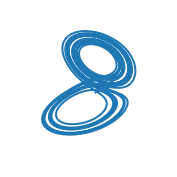

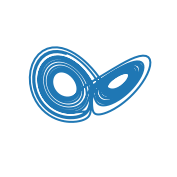

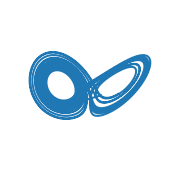

In [15]:
fig1 = plt.figure(figsize=(3,3))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(z_sim[:,0], z_sim[:,1], z_sim[:,2], linewidth=2)
plt.axis('off')
ax1.view_init(azim=120)

fig2 = plt.figure(figsize=(3,3))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot(z_sim_transformed[:,0], z_sim_transformed[:,1], z_sim_transformed[:,2], linewidth=2)
plt.axis('off')
ax2.view_init(azim=120)

fig3 = plt.figure(figsize=(3,3))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot(lorenz_sim[:,0], lorenz_sim[:,1], lorenz_sim[:,2], linewidth=2)
plt.xticks([])
plt.axis('off')
ax3.view_init(azim=120)

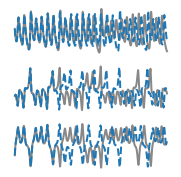

In [16]:
plt.figure(figsize=(3,3))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(t, test_set_results['z'][:,i], color='#888888', linewidth=2)
    plt.plot(t, z_sim[:,i], '--', linewidth=2)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

In [17]:
Xi_plot = (params['coefficient_mask']*test_set_results['sindy_coefficients'])
Xi_plot[Xi_plot==0] = np.inf
plt.figure(figsize=(1,2))
plt.imshow(Xi_plot, interpolation='none')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.clim([-10,30])

Xi_transformed_plot = np.copy(sindy_coefficients_transformed)
Xi_transformed_plot[Xi_transformed_plot==0] = np.inf
plt.figure(figsize=(1,2))
plt.imshow(Xi_transformed_plot, interpolation='none')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.clim([-10,30])

Xi_true_plot = np.copy(test_data['sindy_coefficients'])
Xi_true_plot[Xi_true_plot==0] = np.inf
Xi_true_plot[6,1] = -1.
Xi_true_plot[5,2] = 1.
plt.figure(figsize=(1,2))
plt.imshow(Xi_true_plot, interpolation='none')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.clim([-10,30])

## Test set analysis - in distribution

In [18]:
test_data = get_lorenz_data(100, noise_strength=1e-6)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = tf_results[i]

INFO:tensorflow:Restoring parameters from /home/marsgao/BayesianSindyAutoencoder/exmaples/lorenz/model1


In [20]:
decoder_x_error = np.mean((test_data['x'] - test_set_results['x_decode'])**2)/np.mean(test_data['x']**2)
decoder_dx_error = np.mean((test_data['dx'] - test_set_results['dx_decode'])**2)/np.mean(test_data['dx']**2)
sindy_dz_error = np.mean((test_set_results['dz'] - test_set_results['dz_predict'])**2)/np.mean(test_set_results['dz']**2)

print('Decoder relative error: %f' % decoder_x_error)
print('Decoder relative SINDy error: %f' % decoder_dx_error)
print('SINDy reltive error, z: %f' % sindy_dz_error)

Decoder relative error: 0.000020
Decoder relative SINDy error: 0.000342
SINDy reltive error, z: 0.002117


In [21]:
arr = np.load("save_refinement_1.npy")
print(arr.shape)
arr_truncate = arr[0:-10]
arr_truncate.shape

(110, 20, 3)


(100, 20, 3)

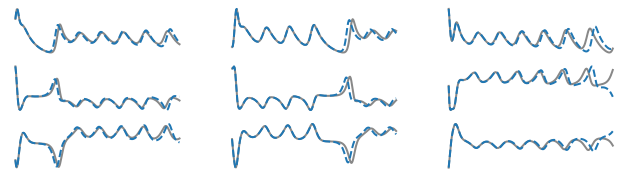

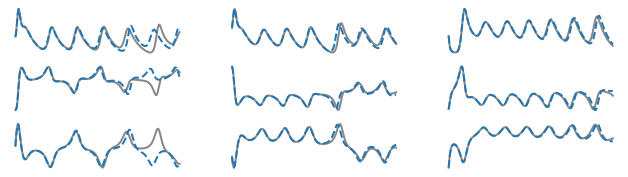

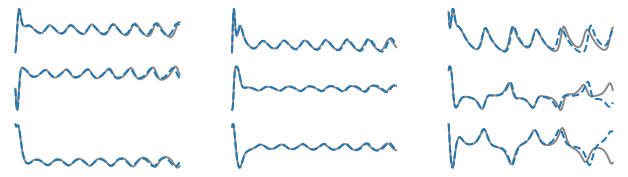

In [22]:
for ic in range(9):
    idxs = np.arange(ic*250,(ic+1)*250)
    
    z_sim = sindy_simulate(test_set_results['z'][250*ic], test_data['t'],
                           params['coefficient_mask']*test_set_results['sindy_coefficients'],
                           params['poly_order'], params['include_sine'])
    
    col_idx = ic % 3
    
    if ic % 3 == 0:
        plt.figure(figsize=(11,3))
    for i in range(3):
        row_idx = i
        subplot_idx = 3*row_idx + col_idx + 1
        plt.subplot(3,3,subplot_idx)
        plt.plot(test_data['t'], test_set_results['z'][idxs,i], color='#888888', linewidth=2)
        plt.plot(test_data['t'], z_sim[:,i], '--', linewidth=2)
        plt.xticks([])
        plt.yticks([])
#         plt.ylim(ylims[i])
        plt.axis('off')

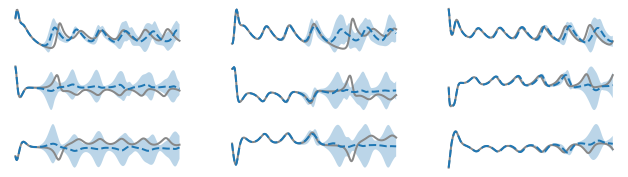

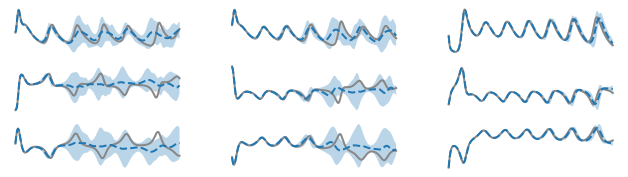

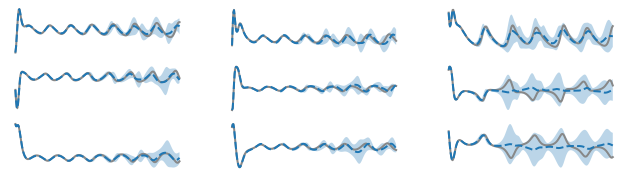

In [23]:
for ic in range(9):
    idxs = np.arange(ic*250,(ic+1)*250)
    
    mc_num = 10
    mc_z_sim = np.zeros((mc_num, 250, 3))
    for i in range(mc_num):
        coeff = arr_truncate[i*5]
        mc_z_sim[i] = sindy_simulate(test_set_results['z'][250*ic], test_data['t'],
                               params['coefficient_mask']*coeff,
                               params['poly_order'], params['include_sine'])
    
    col_idx = ic % 3
    
    if ic % 3 == 0:
        plt.figure(figsize=(11,3))
    for i in range(3):
        row_idx = i
        subplot_idx = 3*row_idx + col_idx + 1
        plt.subplot(3,3,subplot_idx)
        plt.plot(test_data['t'], test_set_results['z'][idxs,i], color='#888888', linewidth=2)
        plt.plot(test_data['t'], np.mean(mc_z_sim[:,:,i], axis=0), '--', linewidth=2)
        plt.fill_between(test_data['t'], 
                         np.mean(mc_z_sim[:,:,i], axis=0)-2.0*np.std(mc_z_sim[:,:,i], axis=0), 
                         np.mean(mc_z_sim[:,:,i], axis=0)+2.0*np.std(mc_z_sim[:,:,i], axis=0), alpha=0.3)
        plt.xticks([])
        plt.yticks([])
#         plt.ylim(ylims[i])
        plt.axis('off')

## Test set analysis - out of distribution

In [24]:
inDist_ic_widths = np.array([36,48,41])
outDist_extra_width = np.array([18,24,20])
full_width = inDist_ic_widths + outDist_extra_width

t = np.arange(0, 5, .02)
n_ics = 100

i = 0
ics = np.zeros((n_ics,3))
while i < n_ics:
    
    ic = np.array([np.random.uniform(-full_width[0],full_width[0]),
                   np.random.uniform(-full_width[1],full_width[1]),
                   np.random.uniform(-full_width[2],full_width[2]) + 25])
    if ((ic[0] > -inDist_ic_widths[0]) and (ic[0] < inDist_ic_widths[0])) \
        and ((ic[1] > -inDist_ic_widths[1]) and (ic[1] < inDist_ic_widths[1])) \
        and ((ic[2] > 25-inDist_ic_widths[2]) and (ic[2] < 25+inDist_ic_widths[2])):
        continue
    else:
        ics[i] = ic
        i += 1
        
noise_strength = 1e-6

# training test_data
test_data = generate_lorenz_data(ics, t, params['input_dim'], linear=False, normalization=np.array([1/40,1/40,1/40]))
test_data['x'] = test_data['x'].reshape((-1,params['input_dim']))
test_data['x'] += noise_strength*np.random.normal(size=test_data['x'].shape)
test_data['dx'] = test_data['dx'].reshape((-1,params['input_dim']))
test_data['dx'] += noise_strength*np.random.normal(size=test_data['dx'].shape)

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = tf_results[i]

INFO:tensorflow:Restoring parameters from /home/marsgao/BayesianSindyAutoencoder/exmaples/lorenz/model1


In [26]:
decoder_x_error = np.mean((test_data['x'] - test_set_results['x_decode'])**2)/np.mean(test_data['x']**2)
decoder_dx_error = np.mean((test_data['dx'] - test_set_results['dx_decode'])**2)/np.mean(test_data['dx']**2)
sindy_dz_error = np.mean((test_set_results['dz'] - test_set_results['dz_predict'])**2)/np.mean(test_set_results['dz']**2)

print('Decoder relative error: %f' % decoder_x_error)
print('Decoder relative SINDy error: %f' % decoder_dx_error)
print('SINDy reltive error, z: %f' % sindy_dz_error)

Decoder relative error: 0.015361
Decoder relative SINDy error: 0.120493
SINDy reltive error, z: 0.183651


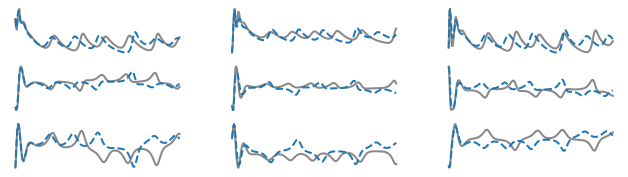

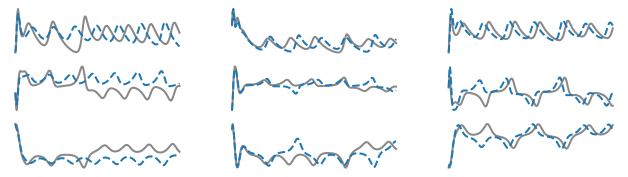

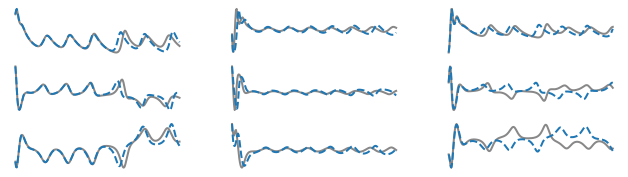

In [27]:
for ic in range(9):
    idxs = np.arange(ic*250,(ic+1)*250)
    
    z_sim = sindy_simulate(test_set_results['z'][250*ic], test_data['t'],
                           params['coefficient_mask']*test_set_results['sindy_coefficients'],
                           params['poly_order'], params['include_sine'])
    
    col_idx = ic % 3
    
    if ic % 3 == 0:
        plt.figure(figsize=(11,3))
    for i in range(3):
        row_idx = i
        subplot_idx = 3*row_idx + col_idx + 1
        plt.subplot(3,3,subplot_idx)
        plt.plot(test_data['t'], test_set_results['z'][idxs,i], color='#888888', linewidth=2)
        plt.plot(test_data['t'], z_sim[:,i], '--', linewidth=2)
        plt.xticks([])
        plt.yticks([])
#         plt.ylim(ylims[i])
        plt.axis('off')

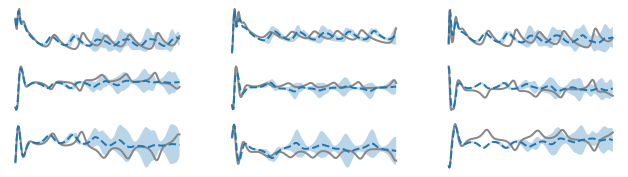

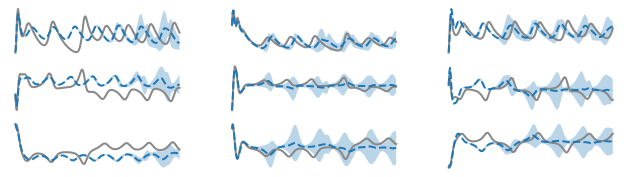

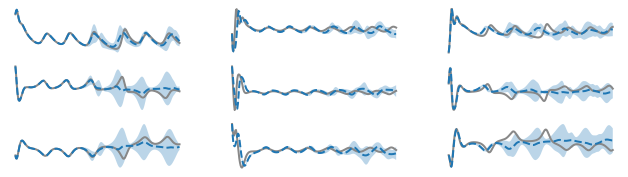

In [28]:
for ic in range(9):
    idxs = np.arange(ic*250,(ic+1)*250)
    
    mc_num = 10
    mc_z_sim = np.zeros((mc_num, 250, 3))
    for i in range(mc_num):
        coeff = arr_truncate[i*5]
        mc_z_sim[i] = sindy_simulate(test_set_results['z'][250*ic], test_data['t'],
                               params['coefficient_mask']*coeff,
                               params['poly_order'], params['include_sine'])
    
    col_idx = ic % 3
    
    if ic % 3 == 0:
        plt.figure(figsize=(11,3))
    for i in range(3):
        row_idx = i
        subplot_idx = 3*row_idx + col_idx + 1
        plt.subplot(3,3,subplot_idx)
        plt.plot(test_data['t'], test_set_results['z'][idxs,i], color='#888888', linewidth=2)
        plt.plot(test_data['t'], np.mean(mc_z_sim[:,:,i], axis=0), '--', linewidth=2)
        plt.fill_between(test_data['t'], 
                         np.mean(mc_z_sim[:,:,i], axis=0)-2.0*np.std(mc_z_sim[:,:,i], axis=0), 
                         np.mean(mc_z_sim[:,:,i], axis=0)+2.0*np.std(mc_z_sim[:,:,i], axis=0), alpha=0.3)
        plt.xticks([])
        plt.yticks([])
#         plt.ylim(ylims[i])
        plt.axis('off')

In [29]:
arr_truncate = arr_truncate.reshape((100, 20, 3))
arr_mean = np.mean(arr_truncate, axis=0)
arr_std = np.std(arr_truncate, axis=0)

a3 = 1
a2 = test_data['sindy_coefficients'][2,0]/arr_mean['sindy_coefficients'][2,2]
a1 = np.sqrt(-arr_mean['sindy_coefficients'][8,0]/arr_mean['sindy_coefficients'][6,1]*a2**2)
b1 = -arr_mean['sindy_coefficients'][0,0]/arr_mean['sindy_coefficients'][1,0]

sindy_coefficients_transformed = np.zeros(test_set_results['sindy_coefficients'].shape)
sindy_coefficients_transformed[1,0] = test_set_results['sindy_coefficients'][3,2]
sindy_coefficients_transformed[2,0] = test_set_results['sindy_coefficients'][2,2]*a2/a3
sindy_coefficients_transformed[1,1] = test_set_results['sindy_coefficients'][6,1]*a3/a2*b1
sindy_coefficients_transformed[2,1] = test_set_results['sindy_coefficients'][2,1]
sindy_coefficients_transformed[6,1] = test_set_results['sindy_coefficients'][6,1]*a3*a1/a2
sindy_coefficients_transformed[3,2] = test_set_results['sindy_coefficients'][1,0]
sindy_coefficients_transformed[5,2] = test_set_results['sindy_coefficients'][8,0]*a3*a2/a1

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

i, n: 0 0
-0.021602848677549934 0.18430048275828226
i, n: 1 0
0.0242741944784715 0.21130746973652184
i, n: 2 0
-10.586421413187466 0.21322387516006436
i, n: 3 0
-10.117180772366815 0.23661110880081876
i, n: 4 0
9.124779573151303e-05 0.19725780790051942
i, n: 5 0
0.038666009534627614 0.22210800655016202
i, n: 6 0
-0.033930685289140554 0.20639418738812534
i, n: 7 0
0.015820191267746274 0.1953913270873449
i, n: 8 0
-0.001515564304987828 0.21767715444322416
i, n: 9 0
0.007106582039656803 0.21397676235551102
i, n: 0 1
0.012535177385897529 0.19940167154961094
i, n: 1 1
0.003521706227612408 0.19730183031100904
i, n: 2 1
-0.8557286509670557 0.19951761011777197
i, n: 3 1
0.012543601824097498 0.1957962217728249
i, n: 4 1
-0.01458450382740923 0.18209410178240615
i, n: 5 1
-0.034956900903656475 0.2053630693820872
i, n: 6 1
9.115607598312483 0.1834079245014132
i, n: 7 1
-0.028262365967010053 0.21105924895199824
i, n: 8 1
0.0074883118880207785 0.20764298062664074
i, n: 9 1
-0.018659039994905507 0.18

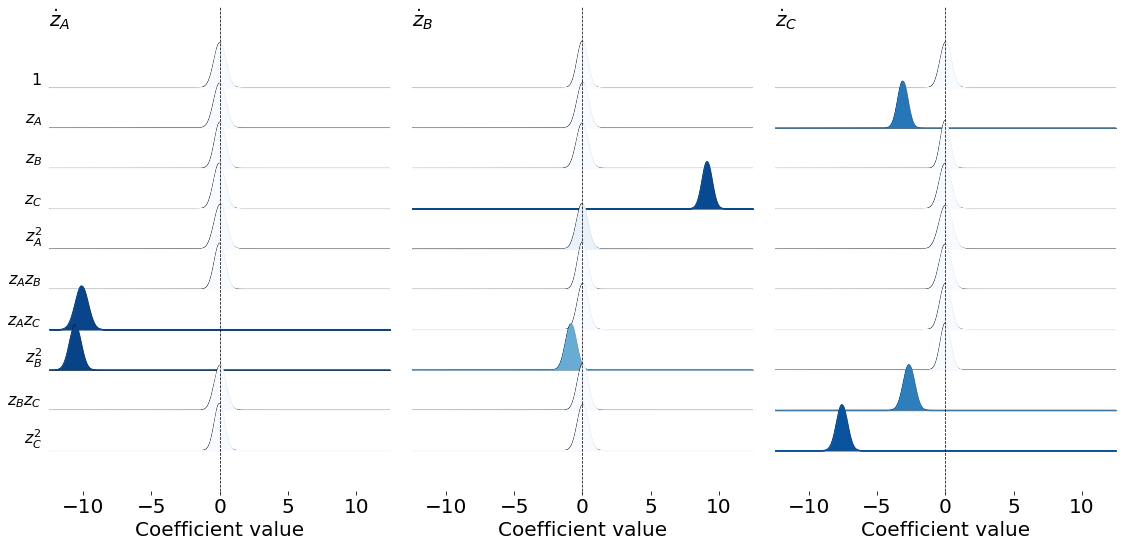

In [32]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# library_names = [r"$1$", r"$z_1$", r"$z_2$", r"$z_3$", r"$z_1^2$", r"$z_1z_2$",
#                 r"$z_1z_3$",r"$z_2^2$",r"$z_2z_3$",r"$z_3^2$",r"$z_1^3$",r"$z_1^2z_2$",
#                 r"$z_1^2z_3$",r"$z_1z_2^2$",r"$z_1z_2z_3$",r"$z_1z_3^2$",r"$z_2^3$",r"$z_2^2z_3$",
#                 r"$z_2z_3^2$",r"$z_3^2$"]
library_names = [r"$1$", r"$z_A$", r"$z_B$", r"$z_C$", r"$z_A^2$", r"$z_Az_B$",
                r"$z_Az_C$",r"$z_B^2$",r"$z_Bz_C$",r"$z_C^2$"]
library_names.reverse()
latent_dim_names = [r"$\dot{z}_A$", r"$\dot{z}_B$", r"$\dot{z}_C$"]
def curve(arr):
    n = 1
    center = np.mean(arr)
    scale = np.std(arr)
    print(center, scale)
    scale *= 2.0
    X = np.zeros(500)
    x = np.linspace(-12.5, 12.5, len(X))
    X = 1.0/(scale*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - center) / scale)**2)
    return X

cmap = mpl.cm.get_cmap("Blues")
fig = plt.figure(figsize=(16, 8))
arr_truncate = arr_truncate.reshape((100, 20, 3))
arr_mean = np.mean(arr_truncate, axis=0)
arr_std = np.std(arr_truncate, axis=0)

ax = None
for n in range(3):
    ax = plt.subplot(1, 3, n+1, frameon=False, sharex=ax)
    for i in range(0, 10):
        print("i, n:", i, n)
        Y = curve(arr_truncate[:,i, 2-n] + np.random.normal(0, 0.2, 100))
        Y /= (np.max(Y)*0.1 + np.std(Y))/0.1
        X = np.linspace(-12.5, 12.5, len(Y))
        ax.plot(X, 3 * Y + i, color="k", linewidth=0.75, zorder=99 - i)
        color = cmap((np.log(abs(arr_mean[i, 2-n])) + 2) / 6.0 + 0.2)
        ax.fill_between(X, 3 * Y + i, i, color=color, zorder=100 - i)

    ax.yaxis.set_tick_params(tick1On=False)
    ax.set_xlim(-12.5, 12.5)
    ax.set_ylim(-1, 11)
    ax.axvline(0.0, ls="--", lw=0.75, color="black", zorder=250)
    plt.xlabel("Coefficient value")
    ax.text(
        0.0,
        1.0,
        latent_dim_names[n],
        ha="left",
        va="top",
        weight="bold",
        transform=ax.transAxes,
    )

    if n == 0:
        ax.yaxis.set_tick_params(labelleft=True)
        ax.set_yticks(np.arange(10))
#         ax.set_yticklabels(["Serie %d" % i for i in range(1, len(arr_mean)+1)])
        ax.set_yticklabels(library_names)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(16)
            tick.label.set_verticalalignment("bottom")
    else:
        ax.yaxis.set_tick_params(labelleft=False)

plt.rcParams.update({'font.size': 20})
# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(fig, cax=cax)
plt.tight_layout()
plt.xlabel('Coefficient value')
plt.show()